In [1]:
import sqlite3
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [2]:
# Loading the dataset.
con=sqlite3.connect('/Users/bhuvanagopalakrishnabasapur/PycharmProjects/Practise/Assignments/Wildfire_Project/Wildfire_project/FPA_FOD_20170508.sqlite')
df = pd.read_sql_query("SELECT * FROM Fires", con)
pd.set_option('display.max_columns', None)
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [3]:
# Dropping all those columns whose missing values are greater than 70%
df = df.drop(['COMPLEX_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
            'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'FIRE_CODE', 'LOCAL_FIRE_REPORT_ID'], axis=1)


In [4]:
#Removing the following columns as similar attributes are present with no missing values
#CONT_TIME, FIRE_NAME, CONT_DOY, CONT_DATE, DISCOVERY_TIME
df = df.drop(['CONT_TIME', 'CONT_DOY', 'CONT_DATE', 'DISCOVERY_TIME'], axis=1)

In [5]:
#Removing columns which do not affect the model 
#FIRE_NAME, LOCAL_INCIDENT_ID, FIPS_NAME , FIPS_CODE, NWCG_REPORTING_UNIT_NAME, NWCG_REPORTING_UNIT_ID,  
# NWCG_REPORTING_AGENCY, SOURCE_REPORTING_UNIT, SOURCE_REPORTING_UNIT_NAME, SOURCE_SYSTEM, SOURCE_SYSTEM_TYPE, 
# FPA_ID, FOD_ID, OWNER_CODE, OWNER_DESCR, FIRE_YEAR
# can remove COUNTY as well as there is an attribute STATE and cannot fill median values 
# for COUNTY as they may not match with the states
df = df.drop(['FIRE_NAME', 'LOCAL_INCIDENT_ID', 'FIPS_NAME' , 'FIPS_CODE', 'NWCG_REPORTING_UNIT_NAME', 'NWCG_REPORTING_UNIT_ID',  
                'NWCG_REPORTING_AGENCY', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'SOURCE_SYSTEM', 
                'SOURCE_SYSTEM_TYPE', 'FPA_ID', 'FOD_ID', 'OWNER_CODE', 'OWNER_DESCR', 'COUNTY', 'FIRE_YEAR'], axis=1)

In [6]:
#Observed that the vales in 'Shape' attribute are very long and not understandable. 
# As the shape does not affect the model will be removing Shape as well
df = df.drop(['Shape'], axis=1)

In [7]:
# Removing the attribute STAT_CAUSE_DESCR as STAT_CAUSE_DESCR is the description of STAT_CAUSE_CODE
df = df.drop(['STAT_CAUSE_DESCR'], axis=1)

In [8]:
df.head()

,OBJECTID,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,2453403.5,33,9.0,0.10,A,40.036944,-121.005833,CA
1,2,2453137.5,133,1.0,0.25,A,38.933056,-120.404444,CA
2,3,2453156.5,152,5.0,0.10,A,38.984167,-120.735556,CA
3,4,2453184.5,180,1.0,0.10,A,38.559167,-119.913333,CA
4,5,2453184.5,180,1.0,0.10,A,38.559167,-119.933056,CA


In [9]:
# Creating the varibales X and y and converting them into numpy array

#Changing pandas dataframe to numpy array
y = df['FIRE_SIZE'].values
X = np.concatenate( (df['DISCOVERY_DATE'].values.reshape(-1,1),df['DISCOVERY_DOY'].values.reshape(-1,1), 
                     df['STAT_CAUSE_CODE'].values.reshape(-1,1),df['LATITUDE'].values.reshape(-1,1), 
                     df['LONGITUDE'].values.reshape(-1,1)),axis = 1 )
print(y[0:3])
print(X.shape)

[0.1  0.25 0.1 ]
(1880465, 5)


In [10]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X = sc.fit_transform(X)

In [11]:
# Importing the necessary modules.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as MAE

In [12]:
#case 2
#Training data size = 80%
#Test data size = 20%

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)
print("# Train: {} , #Test: {}".format(X_train.shape[0], X_test.shape[0]))
print("# inputs: {}".format(X_train.shape[1]))
n = X_train.shape[1]

# Train: 1504372 , #Test: 376093
# inputs: 5


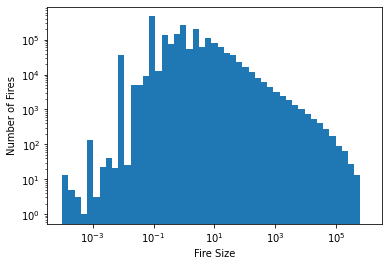

Mean fire size: 74.52015833992388
Median fire size: 1.0
Var in fire size: 6237993.350462397


In [14]:
plt.hist(y, bins=np.logspace(-4,6, 50));
plt.ylabel('Number of Fires')
plt.xlabel('Fire Size')
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.savefig("kaggle_fires_dist_log.png")
plt.show()

print("Mean fire size: {}".format(np.mean(y)))
print("Median fire size: {}".format(np.median(y)))
print("Var in fire size: {}".format(np.var(y)))

In [15]:
#Data Modeling

In [16]:
from sklearn.linear_model import LinearRegression

# This creates a LinearRegression object
lm = LinearRegression()

# Fit a linear model, calculate the root mean squared error 
# and the R2 score.
lm.fit(X_train, y_train)

y_train_predict  = lm.predict(X_train)
y_test_predict = lm.predict(X_test)

# Metrics for evaluation for train set.
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2_train = r2_score(y_train, y_train_predict)

# Metrics for evaluation for test set.
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Training Set: ', r2_train)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Training Set 2560.599181265903
R2 score on Training Set:  0.0026478068523602127
Root mean squared error on Testing Set 2210.111566509068
R2 score on Testing Set:  0.001846214270818436


In [17]:
def mean_absolute_percentage_error(y_true, y_pred):
    '''Writing a function to calculate Mean Absolute Percentage Error'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Mean absolute error (MAE).
print('The MAE of the training set is ',
       MAE(y_train, y_train_predict))
print('The MAE of the testing set is ',
       MAE(y_test, y_test_predict))
# Mean absolute percentage error (MAPE).
print('The MAPE of the training set is ', 
      mean_absolute_percentage_error(y_train, y_train_predict))
print('The MAPE of the testing set is ',
      mean_absolute_percentage_error(y_test, y_test_predict))

In [ ]:
# Predicted vs Actual scatterplot

plt.scatter(y_test, y_test_predict, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Random Forest Regressor
clf = RandomForestRegressor(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt", bootstrap = True,
                               random_state=42)
clf.fit(X_train, y_train)

In [ ]:
# Predicting on the train set
y_train_predicted_rf = clf.predict(X_train)
# Predicting on the test set
y_test_predicted_rf = clf.predict(X_test)

# The Root mean squared error for train set.
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted_rf))
# The Root mean squared error for test set.
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted_rf))
                    
# R2 score for train set.
r2_train_rf = r2_score(y_train, y_train_predicted_rf)
# R2 score for test set.
r2_test_rf = r2_score(y_test, y_test_predicted_rf)

print("Root Mean squared error for train set: ", rmse_train)  
print("Root Mean squared error for test set: ", rmse_test)  
print('R2 score for train set: ', r2_train_rf)
print('R2 score for test set: ', r2_test_rf)

In [ ]:
# Mean absolute error (MAE).
print('The MAE of the training set is ',
       MAE(y_train, y_train_predicted_rf))
print('The MAE of the testing set is ',
       MAE(y_test, y_test_predicted_rf))

# Mean absolute percentage error (MAPE) for Random Forest Regressor Model
print('The MAPE of the training set is ', 
      mean_absolute_percentage_error(y_train, y_train_predicted_rf))
print('The MAPE of the testing set is ',
      mean_absolute_percentage_error(y_test, y_test_predicted_rf))

In [ ]:
# Predicted vs Actual scatterplot

plt.scatter(y_test, y_test_predicted_rf, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

In [ ]:
# SVM
from sklearn import svm

n = 10000
svm_reg = svm.SVR(kernel='rbf', degree=3, gamma='auto')

svm_reg.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

In [ ]:
y_train_predict_svm  = svm_reg.predict(X_train[0:n,:])
y_test_predict_svm = svm_reg.predict(X_test[0:n,:])

In [ ]:
# Metrics for evaluation for train set.
rmse_train_svm = np.sqrt(mean_squared_error(y_train[0:n], y_train_predict_svm))
r2_train_svm = r2_score(y_train[0:n], y_train_predict_svm)

# Metrics for evaluation for test set.
rmse_svm = np.sqrt(mean_squared_error(y_test[0:n], y_test_predict_svm))
r2_svm = r2_score(y_test[0:n], y_test_predict_svm)

print('Root mean squared error on Training Set', rmse_train_svm)
print('R2 score on Training Set: ', r2_train_svm)

print('Root mean squared error on Testing Set', rmse_svm)
print('R2 score on Testing Set: ', r2_svm)
print('----------------------------------------------------------')

In [ ]:
# Mean absolute error (MAE).
print('The MAE of the training set is ',
       MAE(y_train[0:n], y_train_predict_svm))
print('The MAE of the testing set is ',
       MAE(y_test[0:n], y_test_predict_svm))

# Mean absolute percentage error (MAPE).
print('The MAPE of the training set is ', 
      mean_absolute_percentage_error(y_train[0:n], y_train_predict_svm))
print('The MAPE of the testing set is ',
      mean_absolute_percentage_error(y_test[0:n], y_test_predict_svm))

In [ ]:
# Predicted vs Actual scatterplot

plt.scatter(y_test[0:n], y_test_predict_svm, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

In [ ]:
#Knn
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor

n = 50000

for nbs in [3,5,10,15,20]:
    for wts in ['distance','uniform']:
        K_nn = KNeighborsRegressor(n_neighbors=nbs,
                                   weights=wts)

        K_nn.fit(X_train[0:n,:],y_train[0:n].reshape(-1))
        y_train_predict_knn = K_nn.predict(X_train[0:n,:])
        y_test_predict_knn = K_nn.predict(X_test[0:n,:])

        print("nbs: {}, wts: {}".format(nbs, wts))
        print("MAE Train: {}".format(MAE(y_train[0:n],y_train_predict_knn)))
        print("MAE Test: {}".format(MAE(y_test[0:n],y_test_predict_knn)))
        print("r2 Train: {}".format(r2_score(y_train[0:n],y_train_predict_knn)))
        print("r2 Test: {}".format(r2_score(y_test[0:n],y_test_predict_knn)))
        print("---------------------------------------")

In [ ]:
# Predicted vs Actual scatterplot

plt.scatter(y_test[0:n], y_test_predict_knn, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Knn')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

In [ ]:
# Decision Tree
from sklearn import tree

tree_clf = tree.DecisionTreeRegressor(criterion='mae')

tree_clf.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_train_predict_dt = tree_clf.predict(X_train[0:n,:])
y_test_predict_dt = tree_clf.predict(X_test[0:n,:])

print("MAE Train: {}".format(MAE(y_train[0:n],y_train_predict_dt)))
print("MAE Test: {}".format(MAE(y_test[0:n],y_test_predict_dt)))
print("r2 Train: {}".format(r2_score(y_train[0:n],y_train_predict_dt)))
print("r2 Test: {}".format(r2_score(y_test[0:n],y_test_predict_dt)))
print("---------------------------------------")

In [ ]:
# Predicted vs Actual scatterplot

plt.scatter(y_test[0:n], y_test_predict_dt, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

In [ ]:
# Stacked regressors
from mlxtend.regressor import StackingRegressor

n = 100000

estimators = [lm, tree_clf, K_nn, svm_reg]

regStack = StackingRegressor(regressors=estimators,
                            meta_regressor = lm)

regStack.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_train_predict_regStack = regStack.predict(X_train[0:n,:])
y_test_predict_regStack = regStack.predict(X_test[0:n,:])

print("MAE Train: {}".format(MAE(y_train[0:n],y_train_predict_regStack)))
print("MAE Test: {}".format(MAE(y_test[0:n],y_test_predict_regStack)))
print("r2 Train: {}".format(r2_score(y_train[0:n],y_train_predict_regStack)))
print("r2 Test: {}".format(r2_score(y_test[0:n],y_test_predict_regStack)))
print("---------------------------------------")

In [ ]:
# Predicted vs Actual scatterplot

plt.scatter(y_test[0:n], y_test_predict_regStack, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Stacked Regressor')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')